<a href="https://colab.research.google.com/github/villafue/Python_Statistics/blob/master/ab_test/tutorial/datacamp/Customer%20Analytics%20and%20AB%20Testing%20in%20Python/4%20Analyzing%20AB%20Testing%20Results/4_Analyzing_A_B_Testing_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing A/B Testing Results

After running an A/B test, you must analyze the data and then effectively communicate the results. This chapter begins by interleaving the theory of statistical significance and confidence intervals with the tools you need to calculate them yourself from the data. Next we discuss how to effectively visualize and communicate these results. This chapter is the culmination of all the knowledge built over the entire course.

# Analyzing the A/B test results

1. Analyzing the A/B test results
Great Work! Now that our A/B test parameters have been determined, all that is left is for the test to run and for us to analyze the results.

2. Analyzing A/B test results
In this chapter we will explore the techniques used to analyze a test as well as some expansions on this topic that will further your analysis.

3. Evaluating our paywall test
We have now run our discussed A/B test for the required amount of time. We will evaluate the two paywalls by measuring the impact on the general purchase rate from users encountering this paywall.

4. Test results data
Here we have our demographics data and a dataset ab_test_results dot csv. This contains data similar to that from the previous chapter only now limited to the set of results from our A/B test. Additionally, there is a new `group` column that contains either `V` or `C` representing if the user was in the variant or control group.

5. Confirming our test results
Before proceeding it is worth taking a moment to confirm that our test was administered correctly. While you may not always be in a position to determine this directly, you can ensure that the data is sufficiently random.

6. Are our groups the same size?
Here we do this by segmenting our data by the `group` column and comparing the size of each group. They are roughly comparable.

7. Do our groups have similar demographics?
Further we can break out by the relevant demographics: country, device, and gender, and compare the numbers of those two groups to make sure there is no obvious bias in our assignment procedure. This all looks right, so let’s move on.

8. Test & control group conversion rates
Now let’s find the mean conversion for each of our two groups. This is similar to our previous calculations, only now we want to split by the `group`. We first group by `group` and then we can find the total number of purchasers, and paywall viewers in each group. Finally, we can divide these two groups and see our final results of 3 point 4% percent for the control and 4 point 19 percent for the test, which appears substantially higher.

9. Is the result statistically significant?
The next step is to determine whether this difference is statistically significant. That is, measuring if the values differ more than would be expected due to randomness. If this is the case, we can reject the null hypothesis.

10. p-values
To do this we must calculate the p-value. The p-value is the probability of observing a value as or more extreme than the observed value under the Null hypothesis. If this value is low, then it means either our power is low or there is a low probability of observing this value if the Null hypothesis is true. The formula is not important to know at this point. Sufficed to say that is connected in the way described above to the concepts of power and confidence level discussed in the previous chapter, and understanding it conceptually is what is important.

11. Interpreting p-values
Standard practice is to use the following guide to accept or reject based on the p-value. It is worth noting that the p-value and hypothesis testing in general are controversial topics and used with varying degrees of success. This debate is out of the scope of this course but worth following up on if you are interested.

12. Next steps
Now that we have examined our data and confirmed it looks correct, and laid this foundational groundwork, we will confirm our results and explore how to further contextualize them in the next chapter.

13. Let's practice!
Great work, and good luck!

#Confirming Our Test Results

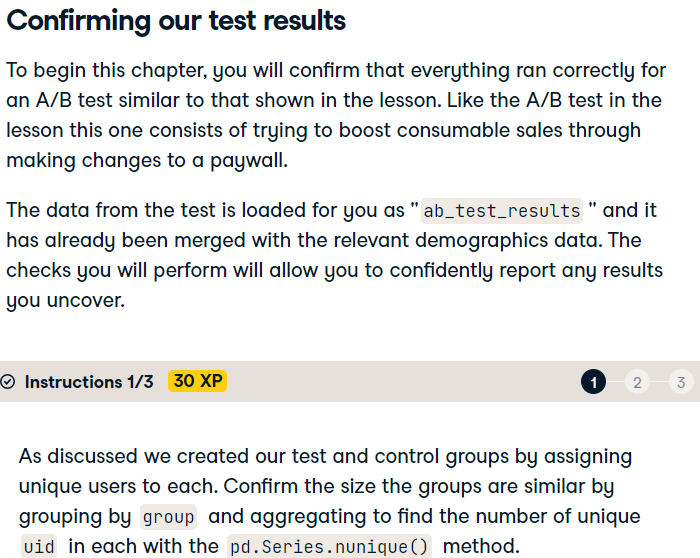

In [ ]:
In [3]:
ab_test_results.head()
Out[3]:

          uid        date  purchase  sku  price  ...    reg_date device gender country age
0  82082526.0  2018-02-15         0  NaN    NaN  ...  2017-03-06    and      F     USA  30
1  82082526.0  2018-02-16         0  NaN    NaN  ...  2017-03-06    and      F     USA  30
2  82082526.0  2018-02-17         0  NaN    NaN  ...  2017-03-06    and      F     USA  30
3  82082526.0  2018-02-18         0  NaN    NaN  ...  2017-03-06    and      F     USA  30
4  82082526.0  2018-02-19         0  NaN    NaN  ...  2017-03-06    and      F     USA  30

[5 rows x 11 columns]

In [ ]:
# Compute and print the results
results = ab_test_results.groupby('group').agg({'uid':pd.Series.nunique}) 
print(results)

<script.py> output:
              uid
    group        
    C      2825.0
    V      2834.0

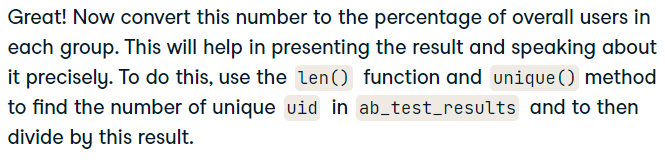

In [ ]:
# Find the unique users in each group 
results = ab_test_results.groupby('group').agg({'uid': pd.Series.nunique}) 

# Find the overall number of unique users using "len" and "unique"
unique_users = len(ab_test_results.uid.unique()) 

# Find the percentage in each group
results = results / unique_users * 100
print(results)

<script.py> output:
                 uid
    group           
    C      49.920481
    V      50.079519

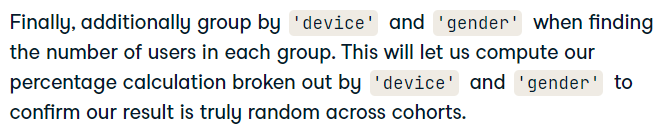

In [ ]:
# Find the unique users in each group, by device and gender
results = ab_test_results.groupby(by=['group', 'device', 'gender']).agg({'uid': pd.Series.nunique}) 

# Find the overall number of unique users using "len" and "unique"
unique_users = len(ab_test_results.uid.unique())

# Find the percentage in each group
results = results / unique_users * 100
print(results)

<script.py> output:
                               uid
    group device gender           
    C     and    F       14.896625
                 M       13.518289
          iOS    F       11.309419
                 M       10.196148
    V     and    F       14.861283
                 M       13.659657
          iOS    F       10.920657
                 M       10.637922

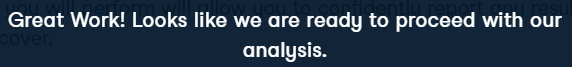

# Thinking critically about p-values

Below are four statements about p-values. It is up to you to identify which one is true. This is important because p-values are an unintuitive concept and being able to reason about them correctly is extremely important in most statistical work.

Possible Answers

1. The p-value is the probability that the null hypothesis is true given the data observed.
  - False, this is a concept useful in statistics but is not what the p-value is.

2. A large p-value should always be interpreted as evidence in favor of the null hypothesis.
  - False, this could also be the result of a test with low power.

3. The p-value is the probability of observing a value as or more extreme than the one observed under the Null Hypothesis.
  - Correct, this is precisely what a p-value represents! Good Work.
  
4. If the evidence for the Null Hypothesis is strong, then the p-value will be small.
  - False, this is backwards. The evidence against the Null Hypothesis is represented by this.

# Understanding statistical significance

1. Understanding statistical significance
Awesome work! Picking up where we left off, we have our A/B test results as well as a conceptual understanding of how to unpack whether or not our observed difference is statistically significant.

2. Revisiting statistical significance
Returning to statistical significance for one last time it is often helpful to look at a picture of what we are describing. Here is the distribution of our data under the Null hypothesis. The line is the conversion rate difference we observed and the inverse of it. The p-value gives the probability of being at or past those lines in the tails, thus a value as or more extreme than our observation.

3. p-value Function
Here is a function that finds the p-value. It takes in our test and control conversion rates and the size of each group. It returns the p-value.

4. Calculating our p-value
Calculating it for our data we see that we have an extremely small p-value. Referring back to the table in the previous lesson, we see that this result would be considered statistically significant. The reason for this is our lift achieved is much larger than what we anticipate in our preparations. We are off to a good start! Now let’s work to provide some context for our result.

5. Finding the power of our test
First, we should find our power. This will help make sure that our estimate is not off and ensure we are not under-weighting the risk of a false negative. We can find this by using the get_power() function from earlier. Calculating the result, we have an extremely high power, which is also influenced by our high percentage lift.

6. What is a confidence interval
We should also provide confidence intervals for our estimate.The confidence interval contextualizes the confidence we have in our estimation process. Specifically, if we provide a 95% confidence interval we are saying that if we had a series of independent experiments and for each estimated an unrelated parameter and a 95% confidence interval, then 95% of the intervals will contain the true parameter. The important thing to note is that the parameters, such as the true conversion rate, are not random, it is the interval that is random.

7. Confidence interval calculation
More details are out of the scope of the course, but calculating the interval for a test such as this is straightforward. We know from previous discussions that our estimated parameter follows a Normal distribution, and from our estimated parameter we can calculate the variance of that distribution. An X% confidence interval then is just the upper and lower bounds that contain X% of the probability density around the mean between them, which we can easily find by using similar to those we have used before.

8. Confidence interval function
Here is a function for calculating the confidence interval, `get_ci()` which takes in the estimated mean of the test and control, as well as the sample sizes of each, and finally the desired confidence interval. It returns a list with the first entry being our lower bound and the second our upper bound.

9. Calculating confidence intervals
Applying this to our own data, we can see that we have a lower bound of 0 point 005 and an upper bound of 0 point 010. Reporting these values along with our estimated difference is much better than just reporting the point estimate. This interval provides context to your audience as to how certain you are about your result and allows them to make more informed decisions based on the data.

10. Next steps
In the next chapter we will build on this theme of contextualizing the results and explore how to visualize the data to even better present it to your audience.

11. Let's practice!
Good luck on the exercises!

#Intuition behind statistical significance

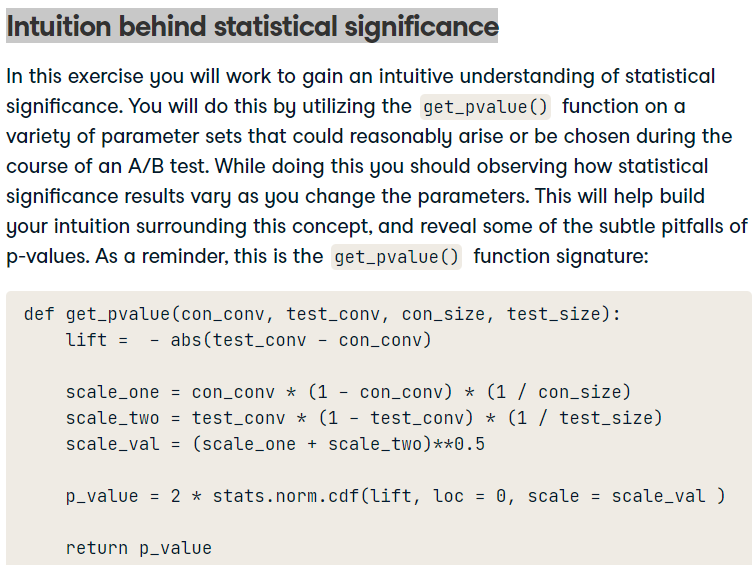

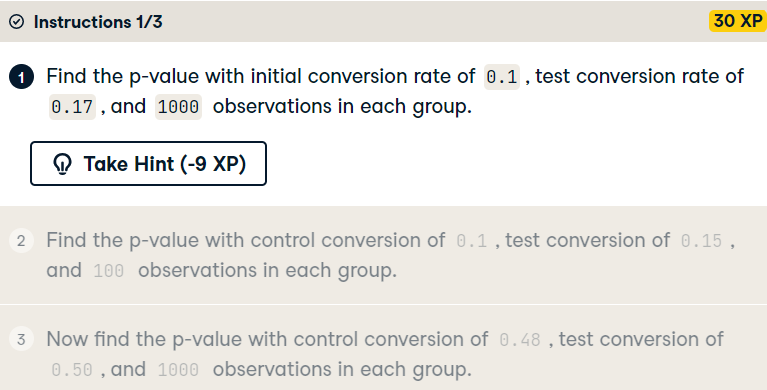

In [ ]:
In [1]:
get_pvalue??
Signature: get_pvalue(con_conv, test_conv, con_size, test_size)
Source:
def get_pvalue(con_conv, test_conv,con_size,  test_size,):  
    lift =  - abs(test_conv - con_conv)
    
    scale_one = con_conv * (1 - con_conv) * (1 / con_size)
    scale_two = test_conv * (1 - test_conv) * (1 / test_size)
    scale_val = (scale_one + scale_two)**0.5

    p_value = 2 * stats.norm.cdf(lift, loc = 0, scale = scale_val )

    return p_value

File:      /tmp/tmpgsyd5142/<ipython-input-1-57f437c91cdc>
Type:      function

In [ ]:
# Get the p-value
p_value = get_pvalue(con_conv=0.1, test_conv=0.17, con_size=1000, test_size=1000)
print(p_value)

<script.py> output:
    4.131297741047306e-06

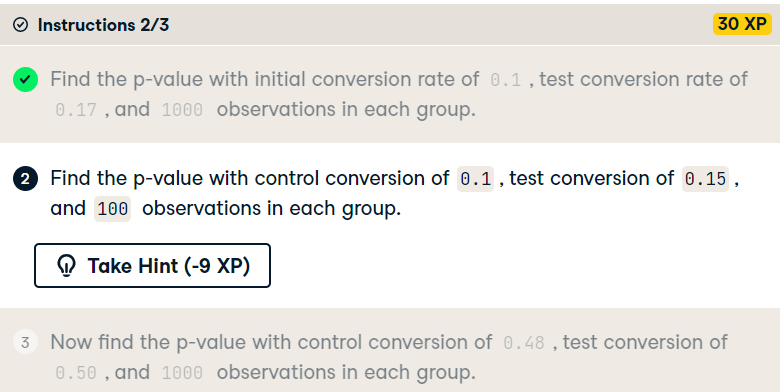

In [ ]:
# Get the p-value
p_value = get_pvalue(con_conv=0.1, test_conv=0.15, con_size=100, test_size=100)
print(p_value)

<script.py> output:
    0.28366948940702086

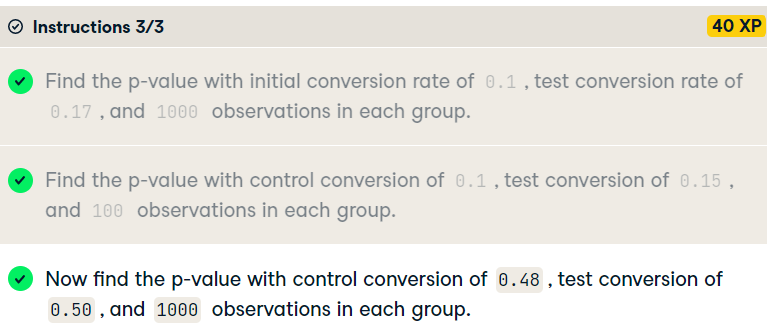

In [ ]:
# Get the p-value
p_value = get_pvalue(con_conv=0.48, test_conv=0.50, con_size=1000, test_size=1000)
print(p_value)

<script.py> output:
    0.370901935824383

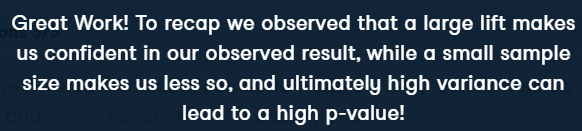

#Checking for Statistical Significance

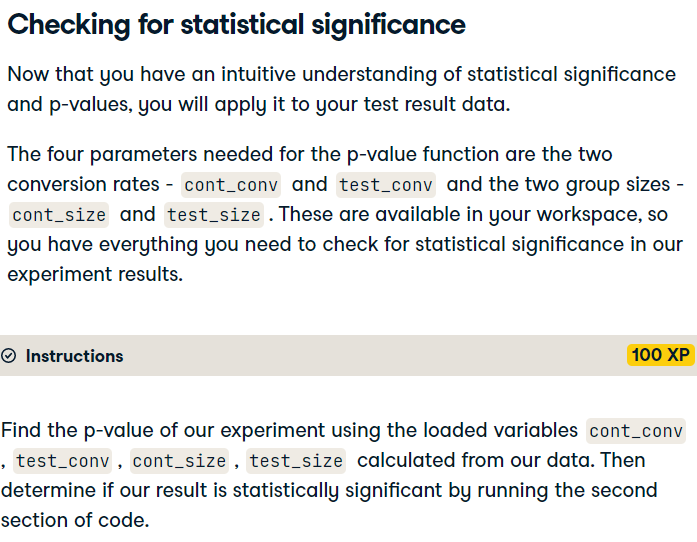

In [ ]:
In [1]:
cont_conv
Out[1]:
0.09096495570387314
In [2]:
test_conv
Out[2]:
0.1020053238686779
In [3]:
cont_size
Out[3]:
5329
In [4]:
test_size
Out[4]:
5748

In [ ]:
# Compute the p-value
p_value = get_pvalue(con_conv=cont_conv, test_conv=test_conv, con_size=cont_size, test_size=test_size)
print(p_value)

# Check for statistical significance
if p_value >= 0.05:
    print("Not Significant")
else:
    print("Significant Result")

<script.py> output:
    0.04900185792087508
    Significant Result

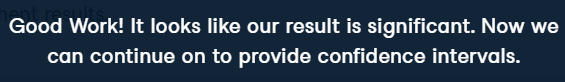

#Understanding Confidence Intervals

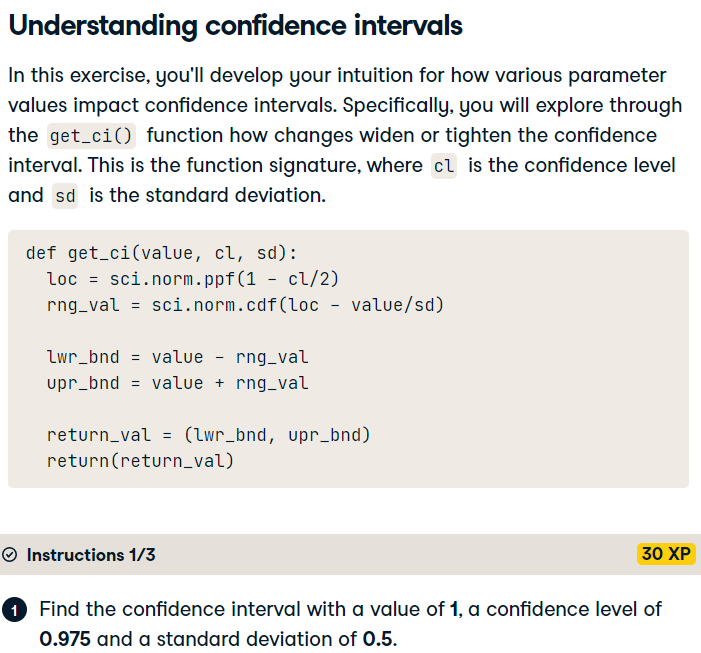

In [ ]:
In [1]:
get_ci??
Signature: get_ci(value, cl, sd)
Source:
def get_ci(value, cl, sd):
  loc = sci.norm.ppf(1 - cl/2)
  rng_val = sci.norm.cdf(loc - value/sd)

  lwr_bnd = value - rng_val
  upr_bnd = value + rng_val 
  
  return_val = (lwr_bnd, upr_bnd)
  return(return_val)

File:      /tmp/tmp5ujc0mfz/<ipython-input-1-ee42e470b7cc>
Type:      function

In [ ]:
# Compute and print the confidence interval
confidence_interval  = get_ci(1, 0.975, 0.5)
print(confidence_interval)

<script.py> output:
    (0.9755040421682947, 1.0244959578317054)

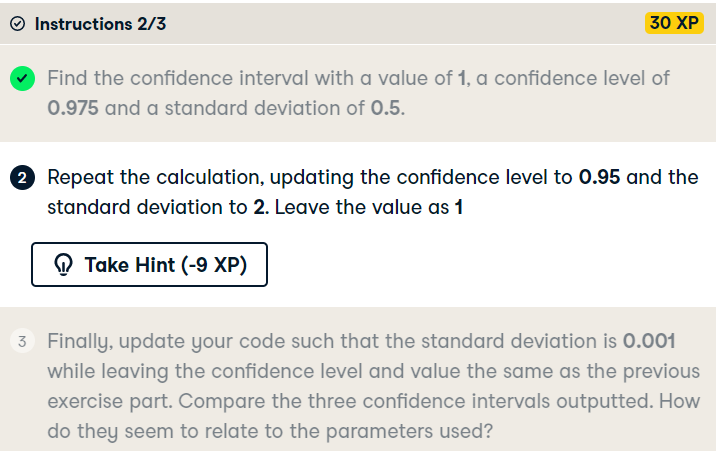

In [ ]:
# Compute and print the confidence interval
confidence_interval  = get_ci(1, 0.95, 2)
print(confidence_interval)

<script.py> output:
    (0.6690506448818785, 1.3309493551181215)

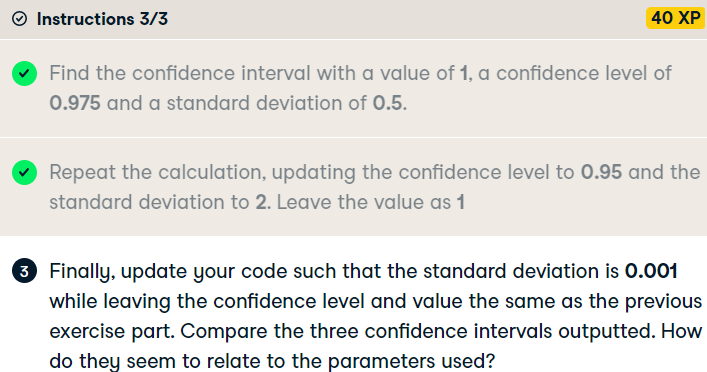

In [ ]:
# Compute and print the confidence interval
confidence_interval  = get_ci(1, 0.95, 0.001)
print(confidence_interval)

<script.py> output:
    (1.0, 1.0)

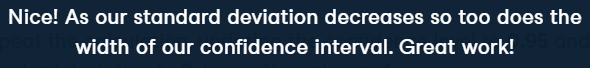

#Calculating Confidence Intervals

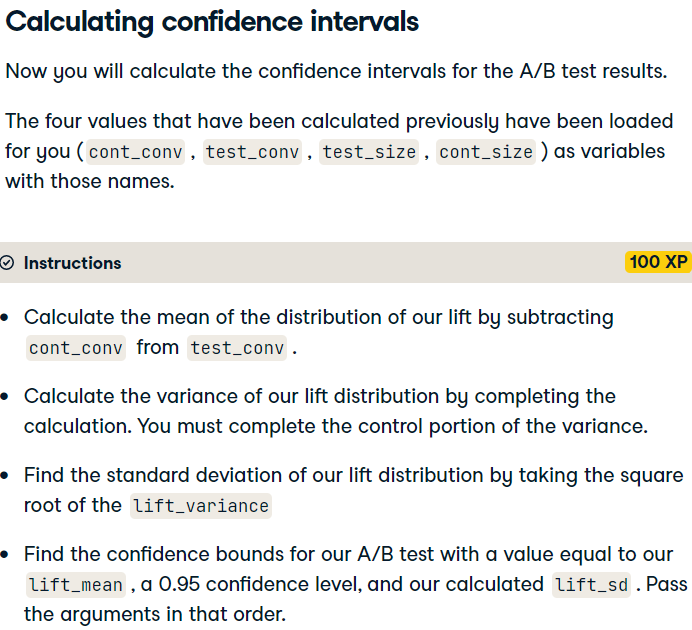

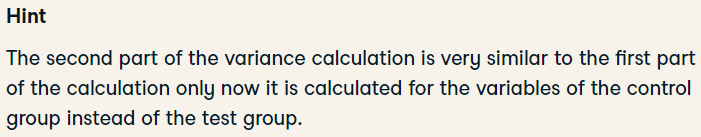

In [ ]:
In [1]:
cont_conv
Out[1]:
0.090965
In [2]:
test_conv
Out[2]:
0.102005
In [3]:
test_size
Out[3]:
56350
In [4]:
cont_size
Out[4]:

In [5]:
get_ci??
Signature: get_ci(value, cl, sd)
Source:
def get_ci(value, cl, sd):
  loc = sci.norm.ppf(1 - cl/2)
  rng_val = sci.norm.cdf(loc - value/sd)

  lwr_bnd = value - rng_val
  upr_bnd = value + rng_val 
  
  return_val = (lwr_bnd, upr_bnd)
  return(return_val)

File:      /tmp/tmpno82l9qq/<ipython-input-1-33514a2b450f>
Type:      function

Below, `lift_mean` needs to be `test_conv - cont_conv` or else it's broken. When it was reversed, I got this value and it was wrong:

```
<script.py> output:
    (-1.011039999921103, 0.9889599999211032)
```

In [ ]:
# Calculate the mean of our lift distribution 
lift_mean = test_conv - cont_conv

# Calculate variance and standard deviation 
lift_variance = (1 - test_conv) * test_conv /test_size + (1 - cont_conv) * cont_conv / cont_size
lift_sd = lift_variance**0.5

# Find the confidence intervals with cl = 0.95
confidence_interval = get_ci(lift_mean, 0.95, lift_sd)
print(confidence_interval)

<script.py> output:
    (0.011039999822042502, 0.011040000177957487)

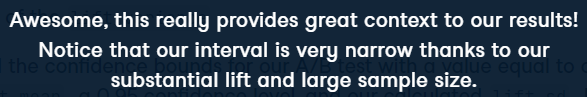

#Interpreting your test results

Got It!
1. Interpreting your test results
Once you have successfully completed your analysis it is important to communicate the results effectively. This is often your responsibility as an analyst.

2. Factors to communicate
The first step is deciding on what data to report. Typically, you will want to share the following, when presenting results. 1 - The sample size for each group. 2 - How long the test ran. 3 - The mean and variance of your two groups, as well as the estimated lift and confidence intervals. These can be presented nicely in a table as the above example from another A/B test illustrates 4 - Finally, you want to provide some indication of whether or not the result was statistically significant.

3. Visualizing your results
Visualizations of the results can also be very useful. While our metric does not lend itself to all types of visualizations, there are other metrics that it might be worth visualizing to provide context. One type of visualization is a histogram of our data. This provides bucketed counts of observations for each value. In this case we can provide a histogram of the conversion rates for each user.

4. Generating a histogram
We will create a distinct histogram for the test and control groups. Here is the purchase rate data already rolled up to the group and user level.

5. Generating a histogram
Now we can call the plt-dot-hist() function on each group. The first argument is the set of data to plot, in this case conversion_rate. Next, we can add labels and add a call to legend function to help us identify the graphs. Additionally, since our plots may overlap, we can specify the alpha-parameter, which gives the graphs some transparency.

6. Annotating our plot
We can add vertical lines, as above, to show where our mean values are.

7. Plotting a distribution
An alternative to plotting histograms is to plot the distribution we are approximating. This is useful because now we can provide this plot for our overall conversion rate. Using our estimated means and variances from before we can easily plot this. To plot the normal distribution, we first use the linespace() function to generate a range of x values to plot over.

8. Plotting a distribution
Next, we can get the probability values associated with those x's using the normpdf function. Then we must plot a line connecting the y values over this range to give us a normal distribution. Now we have our two distributions.

9. Plotting the difference of conversion rates
The final step is to plot our final metric, the difference between these values. This shows our estimated lift. As discussed, this also has a Normal distribution, the parameters of which we calculated in the previous lesson.

10. Plotting the difference of conversion rates
Using these parameters, we can plot our estimated lift by repeating the previous set of steps.

11. Plotting the confidence interval
One final addition we can make to this is to plot our confidence interval. In the last lesson we found the bounds of this. To visualize this, we can color in this region. First, we want to generate a set of points in this region, which can be done with the np-dot-arrange() method. We simply pass in a starting point and a step size. Next we call the fill_between() method as a part of our graph generation. We specify our x and y values as before. As we can see in our final plot this is a great way to express a large amount of information simply and intuitively.

12. Let's practice!
Great Job! Now let’s practice communicating our results.

#Plotting the Distribution

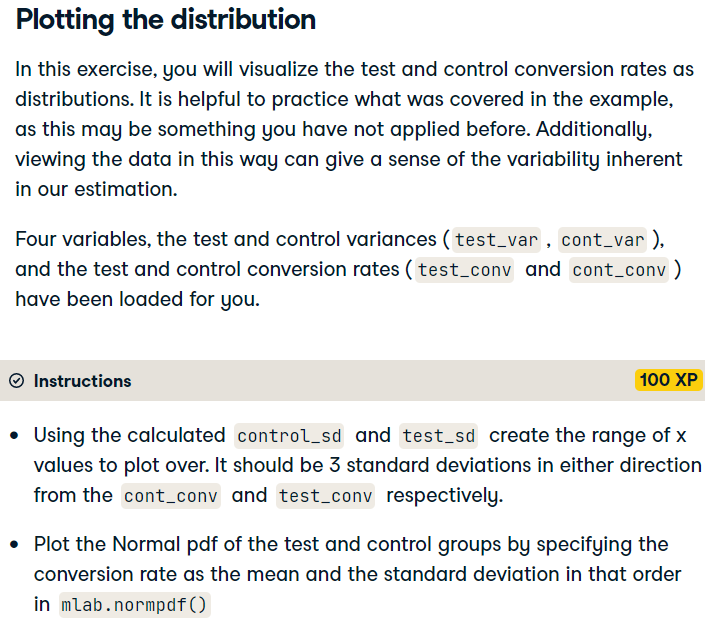

In [ ]:
In [1]:
test_var
Out[1]:
1.6255542142857143e-06
In [2]:
cont_var
Out[2]:
1.411507925080655e-06
In [3]:
test_conv
Out[3]:
0.102005
In [4]:
cont_conv
Out[4]:



In [ ]:
# Compute the standard deviations
control_sd = cont_var**0.5
test_sd = test_var**0.5

# Create the range of x values 
control_line = np.linspace( cont_conv - 3 * control_sd, cont_conv + 3 * control_sd , 100)
test_line = np.linspace( test_conv - 3 * test_sd,  test_conv + 3 * test_sd , 100)

# Plot the distribution 
plt.plot(control_line, mlab.normpdf(control_line, cont_conv, control_sd))
plt.plot(test_line, mlab.normpdf(test_line,test_conv, test_sd))
plt.show()

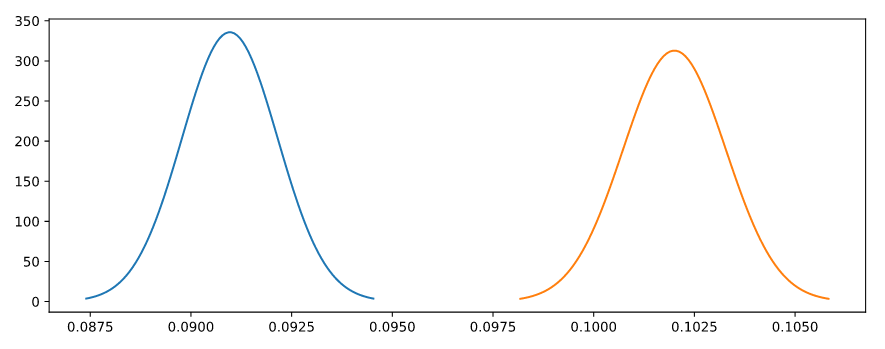

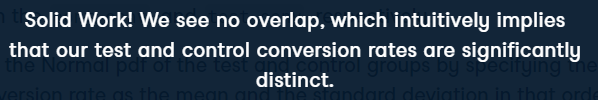

#Plotting the difference distribution

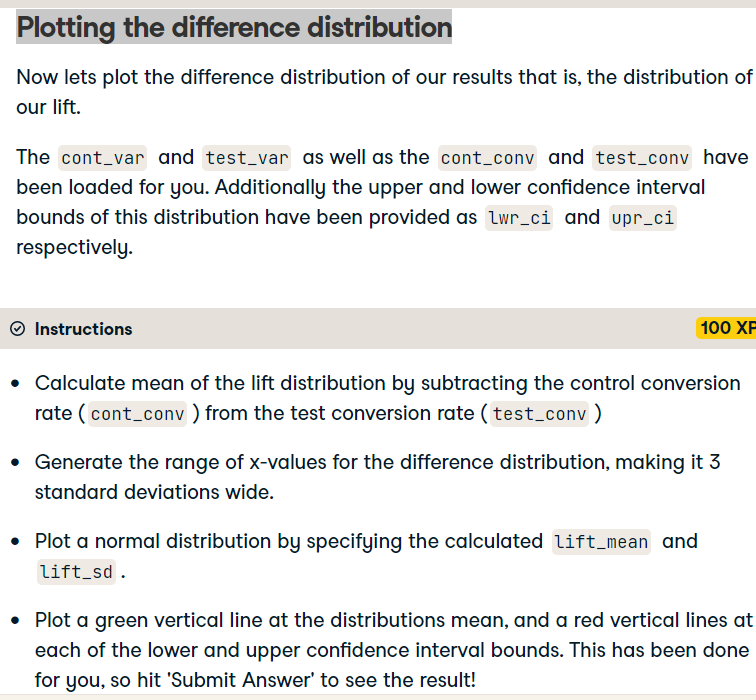

In [ ]:
In [1]:
cont_var
Out[1]:
1.411507925080655e-06
In [2]:
test_var
Out[2]:
1.6255542142857143e-06
In [3]:
cont_conv
Out[3]:
0.090965
In [4]:
test_conv
Out[4]:
0.102005
In [5]:
lwr_ci
Out[5]:
0.01103999822042502
In [6]:
upr_ci
Out[6]:
0.011040000177957487

In [ ]:
# Find the lift mean and standard deviation
lift_mean = test_conv - cont_conv
lift_sd = (test_var + cont_var) ** 0.5

# Generate the range of x-values
lift_line = np.linspace(lift_mean - 3 * lift_sd, lift_mean + 3 * lift_sd, 100)

# Plot the lift distribution
plt.plot(lift_line, mlab.normpdf(lift_line, lift_mean, lift_sd))

# Add the annotation lines
plt.axvline(x = lift_mean, color = 'green')
plt.axvline(x = lwr_ci, color = 'red')
plt.axvline(x = upr_ci, color = 'red')
plt.show()

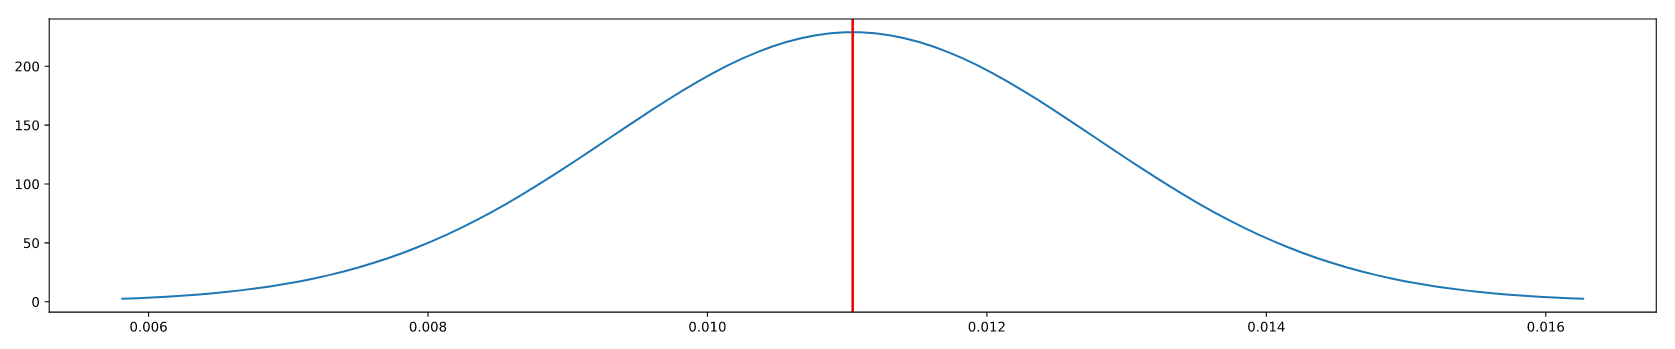

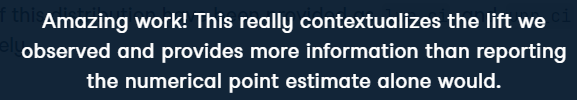

#Finale

Got It!
1. Finale
Congratulations! Great job working through this course. Now that you have completed this course on Customer Analytics and A/B testing you are capable of unlocking deep insights into customer behaviors. You are equipped to define and calculate meaningful KPIs about your user base, and then explore these metrics as they evolve over time with a variety of visualization techniques. Beyond that you are capable of designing an A/B test and analyzing the returned results, a set of skills that is invaluable for understanding causal relationships in customer data. You are now prepared to apply these techniques in practice and continue to build on them by furthering your understanding of statistics and Python. There are many additional courses on DataCamp that can unlock this technical understanding, and the application of these skills to A/B testing will be apparent when viewed through what you learned in this course. Good luck and once again, Congratulations!

2. Let's practice!
Now let's try some examples.